# COMP 6321 Machine Learning Project

In [94]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree        # For DecisionTreeClassifier class
import sklearn.ensemble    # For RandomForestClassifier class
import sklearn.datasets    # For make_circles
import sklearn.metrics     # For accuracy_score
import pandas as pd
import glob

In [112]:
# Random Forest simple training and evaluation code
def randomForestSimple (X_train, y_train, X_test, y_test):
    rfc=sklearn.ensemble.RandomForestClassifier(random_state=0)
    rfc.fit(X_train, y_train)
    z_train=rfc.predict(X_train)
    z_test=rfc.predict(X_test)
    sklearn.metrics.plot_roc_curve(rfc, X_test, y_test)
    return sklearn.metrics.accuracy_score(y_train, z_train)*100, sklearn.metrics.accuracy_score(y_test, z_test)*100

In [4]:
# Random Forest training and evaluation code
def randomForestsTrainEval (X_train, y_train, X_test):
    a_train=np.ndarray((9,11))
    a_test=np.ndarray((9,11))
    for i in range(9):
        for j in range(11):
            rfc=sklearn.ensemble.RandomForestClassifier(random_state=0, n_estimators=2**j, max_depth=i+1)
            rfc.fit(X_train, y_train)
            z_train=rfc.predict(X_train)
            z_test=rfc.predict(X_test)
            a_train[i,j]=sklearn.metrics.accuracy_score(y_train, z_train)
            a_test[i,j]=sklearn.metrics.accuracy_score(y_test, z_test)
    return a_train, a_test

In [5]:
# Random Forest plotting code
def plotAccuracy (a_train, a_test):
    for a in [a_train, a_test]:
        plt.imshow(a, interpolation='nearest', origin='lower')
        plt.title("Accuracy on "+str(("testing", "training")[np.array_equal(a,a_train)])+" data")
        plt.colorbar()
        plt.xlabel('n_estimators')
        plt.ylabel('max_depth')
        plt.xticks(range(11), 2**np.arange(11))
        plt.yticks(range(9), np.arange(9)+1)
        plt.show()

In [6]:
# Ada Boost simple training and evaluation code
def adaBoostSimple (X_train, y_train, X_test):
    abc=sklearn.ensemble.AdaBoostClassifier(random_state=0,algorithm='SAMME.R')
    abc.fit(X_train, y_train)
    z_train=abc.predict(X_train)
    z_test=abc.predict(X_test)
    return sklearn.metrics.accuracy_score(y_train, z_train)*100, sklearn.metrics.accuracy_score(y_test, z_test)*100

In [7]:
# Ada Boost training and evaluation code
def adaBoostTrainEval (X_train, y_train, X_test):
    a_train=np.ndarray((10))
    a_test=np.ndarray((10))
    for i in range(10):
        abc=sklearn.ensemble.AdaBoostClassifier(random_state=0,algorithm='SAMME.R',n_estimators=(i+1)*10)
        abc.fit(X_train, y_train)
        z_train=abc.predict(X_train)
        z_test=abc.predict(X_test)
        a_train[i]=sklearn.metrics.accuracy_score(y_train, z_train)
        a_test[i]=sklearn.metrics.accuracy_score(y_test, z_test)
    return a_train, a_test

In [8]:
# Ada Boost plotting code
def lineAccuracy (a_train, a_test):
    R=np.arange(10, 110, 10)
    plt.plot (R, a_train, label='train accuracy')
    plt.plot (R, a_test, label='test accuracy')
    plt.title ("training accuracy of successive boosting rounds")
    plt.xlabel('R')
    plt.ylabel('percent accuracy')
    plt.ylim(0, 110)
    plt.show()

# 1. Occupancy dataset

In [99]:
# Loading code
R=np.loadtxt('../../datasets/1_occupancy/occupancy_data/datatraining.txt', delimiter=',', skiprows=1, usecols = (2,3,4,5,6,7))
X_train=R[:, 0:5]
y_train=R[:, 5].astype(np.int32)
T=np.loadtxt('../../datasets/1_occupancy/occupancy_data/datatest.txt', delimiter=',', skiprows=1, usecols = (2,3,4,5,6,7))
X_test=T[:, 0:5]
y_test=T[:, 5].astype(np.int32)

100.0
94.93433395872421


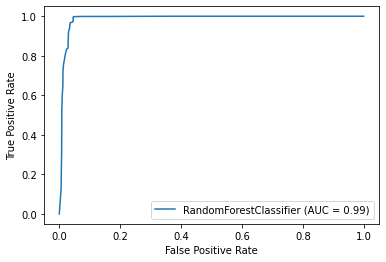

In [113]:
# Simple training and evaluation code
acc_train, acc_test = randomForestSimple (X_train, y_train, X_test, y_test)
print (acc_train)
print (acc_test)

In [11]:
# Training and evaluation code
a_train, a_test=randomForestsTrainEval (X_train, y_train, X_test)

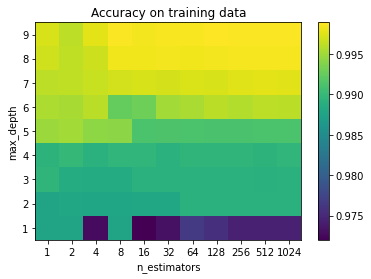

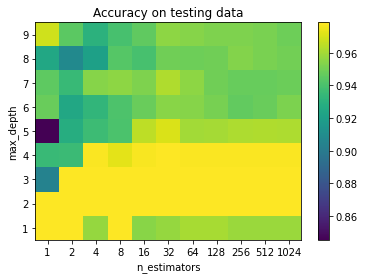

In [12]:
# Plotting code
plotAccuracy (a_train, a_test)

In [13]:
# Simple training and evaluation code
acc_train, acc_test = adaBoostSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

99.48421957509518
97.11069418386492


In [14]:
# Training and evaluation code
a_train, a_test=adaBoostTrainEval (X_train, y_train, X_test)

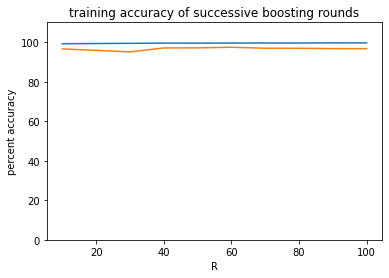

In [15]:
# Plotting code
lineAccuracy (a_train*100, a_test*100)

# 2. Bank Marketing dataset

In [114]:
# Loading code
job_mapping = {'admin.':1, 'blue-collar':2, 'entrepreneur':3, 'housemaid':4, 'management':5, 'retired':6, 'self-employed':7, 'services':8, 'student':9, 'technician':10, 'unemployed':11, 'unknown':0}
boolean_mapping ={'no': 0, 'yes': 1}
marital_mapping ={'divorced':1, 'married':2, 'single':3}
education_mapping={'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'illiterate':5, 'professional.course':6, 'university.degree':7}
contact_mapping={'cellular':1, 'telephone':2}
month_mapping={'may':5, 'jun':6, 'nov':11, 'sep':9, 'jul':7, 'aug':8, 'mar':3, 'oct':10, 'apr':4, 'dec':12}
day_mapping={'fri':5, 'wed':3, 'mon':1, 'thu':4, 'tue':2}
poutcome_mapping={'nonexistent':1, 'failure':2, 'success':3}
R=pd.read_csv('../../datasets/4_bank_additional/bank-additional/bank-additional/bank-additional.csv', delimiter=';').replace(boolean_mapping).replace(job_mapping).replace(marital_mapping).replace(education_mapping).replace(contact_mapping).replace(month_mapping).replace(day_mapping).replace(poutcome_mapping).values
X_train=R[:, [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19]]
y_train=R[:, 20].astype(np.int32)
T=pd.read_csv('../../datasets/4_bank_additional/bank-additional/bank-additional/bank-additional-full.csv', delimiter=';').replace(boolean_mapping).replace(job_mapping).replace(marital_mapping).replace(education_mapping).replace(contact_mapping).replace(month_mapping).replace(day_mapping).replace(poutcome_mapping).values
X_test=T[:, [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19]]
y_test=T[:, 20].astype(np.int32)

99.95144452537023
90.39283286394095


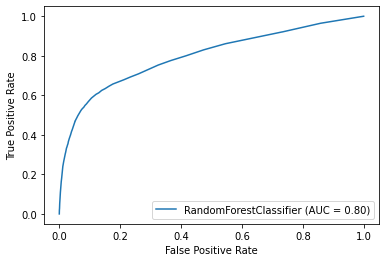

In [115]:
# Simple training and evaluation code
acc_train, acc_test = randomForestSimple (X_train, y_train, X_test, y_test)
print (acc_train)
print (acc_test)

In [20]:
# Training and evaluation code
a_train, a_test=randomForestsTrainEval (X_train, y_train, X_test)

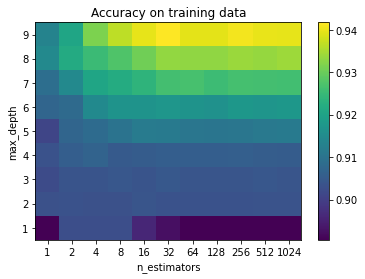

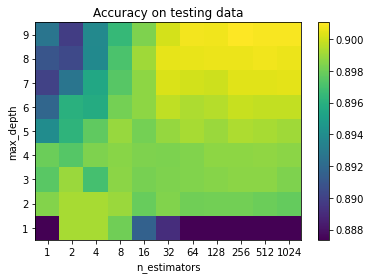

In [21]:
# Plotting code
plotAccuracy (a_train, a_test)

In [22]:
# Simple training and evaluation code
acc_train, acc_test = adaBoostSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

90.43457149793639
89.74701369330873


In [23]:
# Training and evaluation code
a_train, a_test=adaBoostTrainEval (X_train, y_train, X_test)

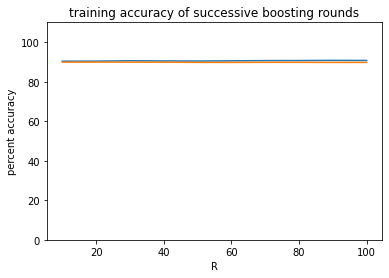

In [24]:
# Plotting code
lineAccuracy (a_train*100, a_test*100)

# 3. Activity Recognition dataset

In [116]:
# Loading code
files = glob.glob("../../datasets/2_healthy_older_people/Datasets_Healthy_Older_People/datasets/S2_Dataset/d*")
Rs = [pd.read_csv(f, header=None) for f in files]
R=pd.concat(Rs,ignore_index=True).values
X_train=R[:, 1:8]
y_train=R[:, 8].astype(np.int32)
files = glob.glob("../../datasets/2_healthy_older_people/Datasets_Healthy_Older_People/datasets/S1_Dataset/d*")
Ts = [pd.read_csv(f, header=None) for f in files]
T=pd.concat(Ts,ignore_index=True).values
X_test=T[:, 1:8]
y_test=T[:, 8].astype(np.int32)

In [117]:
# Simple training and evaluation code
acc_train, acc_test = randomForestSimple (X_train, y_train, X_test, y_test)
print (acc_train)
print (acc_test)

ValueError: RandomForestClassifier should be a binary classifier

In [28]:
# Training and evaluation code
a_train, a_test=randomForestsTrainEval (X_train, y_train, X_test)

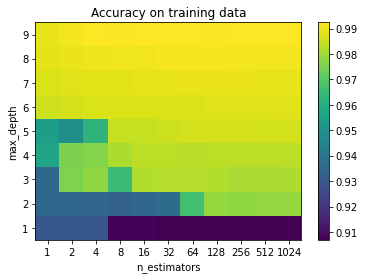

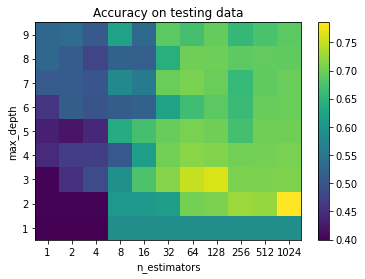

In [29]:
# Plotting code
plotAccuracy (a_train, a_test)

In [30]:
# Simple training and evaluation code
acc_train, acc_test = adaBoostSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

82.32358915481763
13.88094965893068


In [31]:
# Training and evaluation code
a_train, a_test=adaBoostTrainEval (X_train, y_train, X_test)

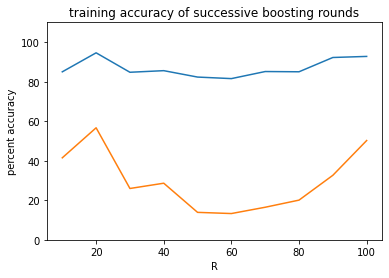

In [32]:
# Plotting code
lineAccuracy (a_train*100, a_test*100)

# 4. Bitcoin Ransomeware dataset

In [118]:
# Loading code
nrows=100000
nparts=10
ntest=nrows//nparts
label_mapping = {'princetonCerber':1, 'princetonLocky':1, 'montrealCryptoLocker':1,
 'montrealCryptXXX':1, 'paduaCryptoWall':1, 'montrealWannaCry':1,
 'montrealDMALockerv3':1, 'montrealCryptoTorLocker2015':1, 'montrealSamSam':1,
 'montrealFlyper':1, 'montrealNoobCrypt':1, 'montrealDMALocker':1, 'montrealGlobe':1,
 'montrealEDA2':1, 'paduaKeRanger':1, 'montrealVenusLocker':1, 'montrealXTPLocker':1,
 'paduaJigsaw':1, 'montrealGlobev3':1, 'montrealJigSaw':1, 'montrealXLockerv5.0':1,
 'montrealXLocker':1, 'montrealRazy':1, 'montrealCryptConsole':1,
 'montrealGlobeImposter':1, 'montrealSam':1, 'montrealComradeCircle':1,
 'montrealAPT':1, 'white':0}
R=pd.read_csv('../../datasets/3_bitcoin_heist_ransonware_address/data/BitcoinHeistData.csv', nrows=nrows, usecols=["year","day","length","weight","count","looped","neighbors","income","label"]).replace(label_mapping).values
np.random.seed(0)
np.random.shuffle(R)
X_train=R[:ntest, 0:8]
y_train=R[:ntest, 8].astype(np.int32)
X_test=R[ntest:, 0:8]
y_test=R[ntest:, 8].astype(np.int32)

100.0
100.0


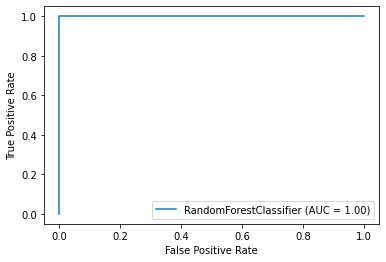

In [119]:
# Simple training and evaluation code
acc_train, acc_test = randomForestSimple (X_train, y_train, X_test, y_test)
print (acc_train)
print (acc_test)

In [36]:
# Training and evaluation code
a_train, a_test=randomForestsTrainEval (X_train, y_train, X_test)

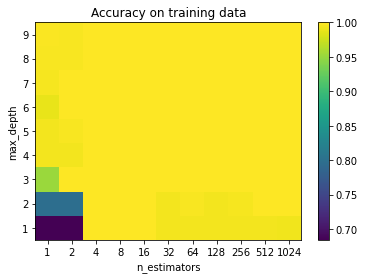

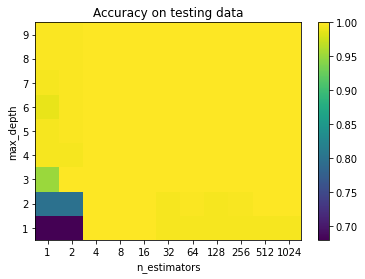

In [37]:
# Plotting code
plotAccuracy (a_train, a_test)

In [38]:
# Simple training and evaluation code
acc_train, acc_test = adaBoostSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

100.0
100.0


In [39]:
# Training and evaluation code
a_train, a_test=adaBoostTrainEval (X_train, y_train, X_test)

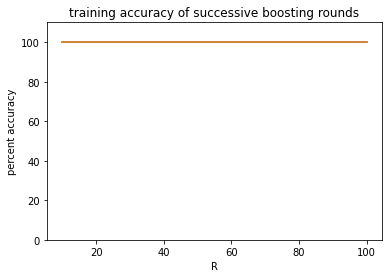

In [40]:
# Plotting code
lineAccuracy (a_train*100, a_test*100)

# 5. Montreal Crime dataset

In [120]:
# Loading code
category_mapping = {'Introduction':1, 'Vol dans / sur véhicule à moteur':2, 'Vol de véhicule à moteur':3, 'Méfait':4, 'Vol qualifié':5, 'Infraction entraînant la mort':6, 'Vols qualifiés':5, 'Infractions entrainant la mort':6}
shift_mapping ={'jour':1, 'soir':2, 'nuit':3}
TR=pd.read_csv('../../datasets/5_interventionscitoyendo/interventionscitoyendo.csv', encoding='latin1').replace(category_mapping).replace(shift_mapping)
TR['YEAR']=TR.DATE.str.split('-').str[0].astype(np.int32)
TR['MONTH']=TR.DATE.str.split('-').str[1].astype(np.int32)
TR['DAY']=TR.DATE.str.split('-').str[2].astype(np.int32)
TR.dropna(inplace=True)
R_train=TR.loc[TR['YEAR'] == 2018].values
X_train=R_train[:, [2,3,4,5,6,7,9,10]]
y_train=R_train[:, 0].astype(np.int32)
R_test=TR.loc[TR['YEAR'] == 2019].values
X_test=R_test[:, [2,3,4,5,6,7,9,10]]
y_test=R_test[:, 0].astype(np.int32)

In [121]:
# Simple training and evaluation code
acc_train, acc_test = randomForestSimple (X_train, y_train, X_test, y_test)
print (acc_train)
print (acc_test)

ValueError: RandomForestClassifier should be a binary classifier

In [43]:
# Training and evaluation code
a_train, a_test=randomForestsTrainEval (X_train, y_train, X_test)

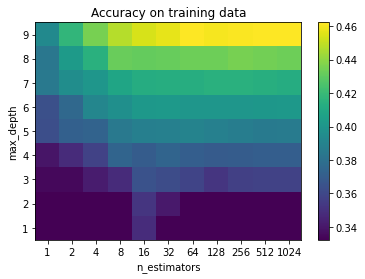

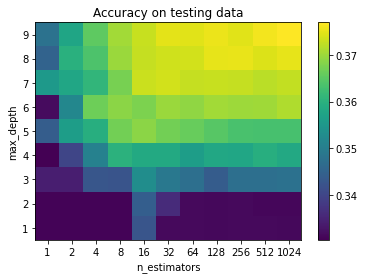

In [44]:
# Plotting code
plotAccuracy (a_train, a_test)

In [45]:
# Simple training and evaluation code
acc_train, acc_test = adaBoostSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

36.35595011625449
34.531393850119684


In [46]:
# Training and evaluation code
a_train, a_test=adaBoostTrainEval (X_train, y_train, X_test)

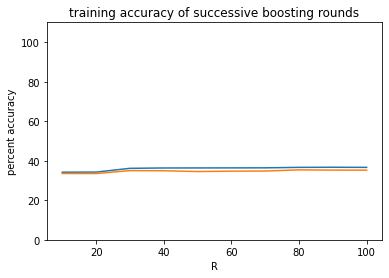

In [47]:
# Plotting code
lineAccuracy (a_train*100, a_test*100)

# 6. Credit Card dataset

In [122]:
# Loading code
R=pd.read_csv('../../datasets/6_credit_cards/default_of_credit_card_clients.csv', skiprows=1, usecols=np.arange(1, 26, 1)).values

X = R[:, :23]
y = R[:, 23].astype(np.int32)
X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

99.97500000000001
80.7


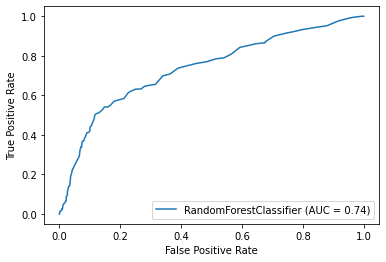

In [123]:
# Simple training and evaluation code
acc_train, acc_test = randomForestSimple (X_train, y_train, X_test, y_test)
print (acc_train)
print (acc_test)

In [71]:
# Training and evaluation code
a_train, a_test=randomForestsTrainEval (X_train, y_train, X_test)

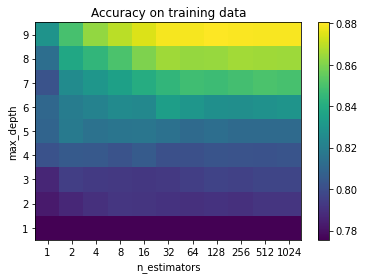

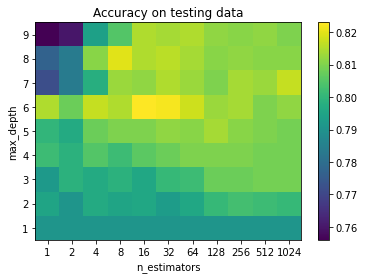

In [53]:
# Plotting code
plotAccuracy (a_train, a_test)

In [54]:
# Simple training and evaluation code
acc_train, acc_test = adaBoostSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

80.35
80.80000000000001


In [55]:
# Training and evaluation code
a_train, a_test=adaBoostTrainEval (X_train, y_train, X_test)

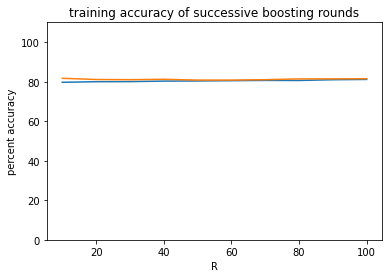

In [56]:
# Plotting code
lineAccuracy (a_train*100, a_test*100)

# 7. Census Income Dataset

In [124]:
# Loading code
TR=pd.read_csv('../../datasets/7_census_income/adult_data.csv', encoding='utf8', header=None)
TR = TR.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)

workclass_mapping = {'Private':1, 'Self-emp-not-inc':2
                    , 'Self-emp-inc':3, 'Federal-gov':4
                    , 'Local-gov':5, 'State-gov':6
                    , 'Without-pay':7, 'Never-worked':8}
TR = TR.replace(workclass_mapping)


education_mapping = {'Bachelors':1, 'Some-college':2, '11th':3
                     , 'HS-grad':4, 'Prof-school':5, 'Assoc-acdm':6
                     , 'Assoc-voc':7, '9th':8, '7th-8th':9
                     , '12th':10, 'Masters':11, '1st-4th':12
                     , '10th':13, 'Doctorate':14, '5th-6th':15
                     , 'Preschool':16}
TR = TR.replace(education_mapping)

marital_status_mapping = {'Married-civ-spouse':1, 'Divorced':2, 'Never-married':3
                          , 'Separated':4, 'Widowed':5, 'Married-spouse-absent':6
                          , 'Married-AF-spouse':7}
TR = TR.replace(marital_status_mapping)

occupation_mapping = {'Tech-support':1, 'Craft-repair':2, 'Other-service':3
                      , 'Sales':4, 'Exec-managerial':5, 'Prof-specialty':6
                      , 'Handlers-cleaners':7, 'Machine-op-inspct':8, 'Adm-clerical':9
                      , 'Farming-fishing':10, 'Transport-moving':11, 'Priv-house-serv':12
                      , 'Protective-serv':13, 'Armed-Forces':14}
TR = TR.replace(occupation_mapping)

relationship_mapping = {'Wife':1, 'Own-child':2, 'Husband':3
                , 'Not-in-family':4, 'Other-relative':5, 'Unmarried':6}
TR = TR.replace(relationship_mapping)

race_mapping = {'White':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3
                , 'Other':4, 'Black':5}
TR = TR.replace(race_mapping)

sex_mapping = {'Female':1, 'Male':2}
TR = TR.replace(sex_mapping)

country_mapping = {'United-States':1, 'Cambodia':2, 'England':3
                   , 'Puerto-Rico':4, 'Canada':5, 'Germany':6
                   , 'Outlying-US(Guam-USVI-etc)':7, 'India':8
                   , 'Japan':9, 'Greece':10, 'South':11
                   , 'China':12, 'Cuba':13, 'Iran':14
                   , 'Honduras':15, 'Philippines':16, 'Italy':17
                   , 'Poland':18, 'Jamaica':19, 'Vietnam':20
                   , 'Mexico':21, 'Portugal':22, 'Ireland':23
                   , 'France':24, 'Dominican-Republic':25, 'Laos':26
                   , 'Ecuador':27, 'Taiwan':28, 'Haiti':29
                   , 'Columbia':30, 'Hungary':31, 'Guatemala':32
                   , 'Nicaragua':33, 'Scotland':34, 'Thailand':35
                   , 'Yugoslavia':36, 'El-Salvador':37, 'Trinadad&Tobago':38
                   , 'Peru':39, 'Hong':40, 'Holand-Netherlands':41}
TR = TR.replace(country_mapping)

salary_mapping = {'<=50K':0, '>50K':1}
TR = TR.replace(salary_mapping)

TR = TR.replace(to_replace='?', value=np.nan)
TR.dropna(inplace=True)

R=TR.values
shape = R.shape
X = R[:, :shape[1]-1].astype(np.float32)
y = R[:, shape[1]-1].astype(np.int32)

X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

100.0
84.8


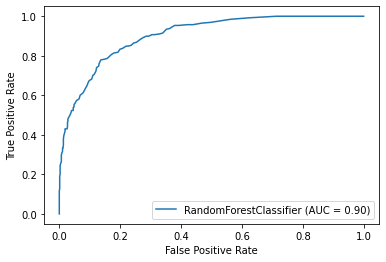

In [125]:
# Simple training and evaluation code
acc_train, acc_test = randomForestSimple (X_train, y_train, X_test, y_test)
print (acc_train)
print (acc_test)

In [63]:
# Training and evaluation code
a_train, a_test=randomForestsTrainEval (X_train, y_train, X_test)

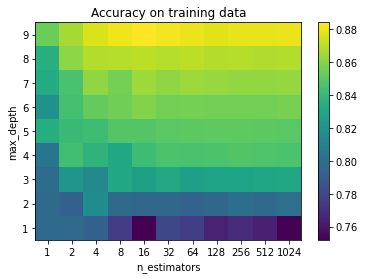

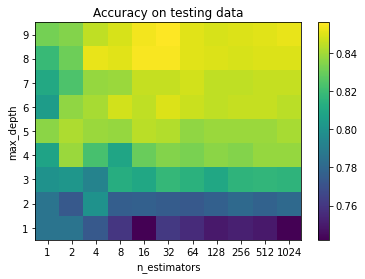

In [64]:
# Plotting code
plotAccuracy (a_train, a_test)

In [65]:
# Simple training and evaluation code
acc_train, acc_test = adaBoostSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

85.425
84.89999999999999


In [66]:
# Training and evaluation code
a_train, a_test=adaBoostTrainEval (X_train, y_train, X_test)

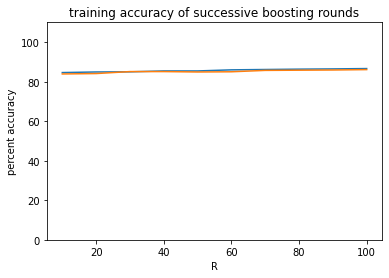

In [67]:
# Plotting code
lineAccuracy (a_train*100, a_test*100)

# 8. Yeast Dataset

In [126]:
# Loading code
TR=pd.read_csv('../../datasets/8_yeast/yeast_dataset.csv', encoding='utf8', header=None, usecols = np.arange(1, 10, 1))
TR = TR.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)

localization_site_mapping = {'MIT':1, 'NUC':2, 'CYT':3
                     , 'ME1':4, 'EXC':5, 'ME2':6
                     , 'ME3':7, 'VAC':8, 'POX':9
                     , 'ERL':10}
TR = TR.replace(localization_site_mapping)

TR = TR.replace(to_replace='?', value=np.nan)
TR.dropna(inplace=True)

R=TR.values
shape = R.shape
X = R[:, :shape[1]-1].astype(np.float32)
y = R[:, shape[1]-1].astype(np.int32)

X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [127]:
# Simple training and evaluation code
acc_train, acc_test = randomForestSimple (X_train, y_train, X_test, y_test)
print (acc_train)
print (acc_test)

ValueError: RandomForestClassifier should be a binary classifier

In [76]:
# Training and evaluation code
a_train, a_test=randomForestsTrainEval (X_train, y_train, X_test)

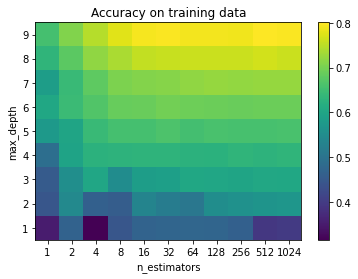

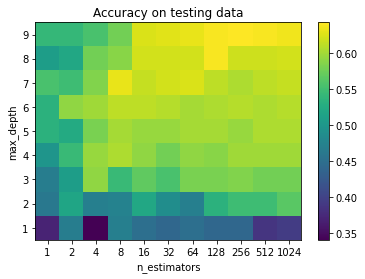

In [77]:
# Plotting code
plotAccuracy (a_train, a_test)

In [78]:
# Simple training and evaluation code
acc_train, acc_test = adaBoostSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

44.987363100252736
43.77104377104377


In [79]:
# Training and evaluation code
a_train, a_test=adaBoostTrainEval (X_train, y_train, X_test)

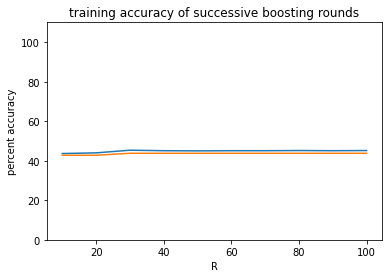

In [80]:
# Plotting code
lineAccuracy (a_train*100, a_test*100)

# 9. Magic Gamma Telescope

In [128]:
# Loading code
mapping = {'h':0, 'g':1}

data_magic = pd.read_csv('../../datasets/9_magic_gamma/MagicGamma.txt',delimiter=',',names=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fm3Long','fm3Trans','fAlpha','fDist','class']).replace(mapping)
X=data_magic.iloc[:,:-1]
y=data_magic.iloc[:,-1]
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)

100.0
88.0651945320715


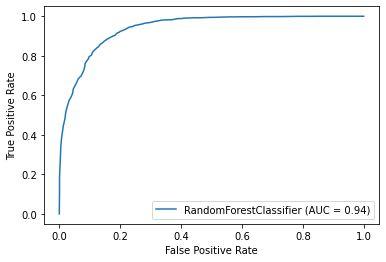

In [129]:
# Simple training and evaluation code
acc_train, acc_test = randomForestSimple (X_train, y_train, X_test, y_test)
print (acc_train)
print (acc_test)

In [89]:
# Training and evaluation code
a_train, a_test=randomForestsTrainEval (X_train, y_train, X_test)

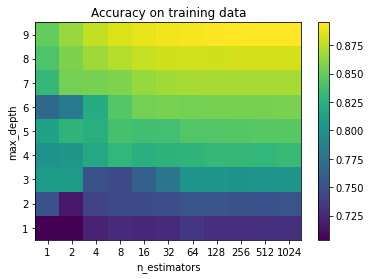

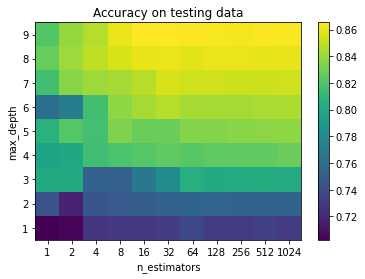

In [90]:
# Plotting code
plotAccuracy (a_train, a_test)

In [91]:
# Simple training and evaluation code
acc_train, acc_test = adaBoostSimple (X_train, y_train, X_test)
print (acc_train)
print (acc_test)

84.80546792849631
83.88538380651946


In [92]:
# Training and evaluation code
a_train, a_test=adaBoostTrainEval (X_train, y_train, X_test)

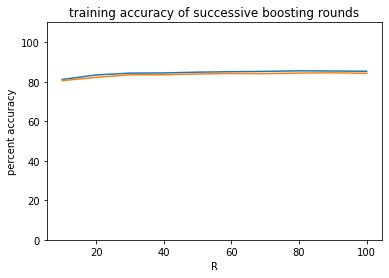

In [93]:
# Plotting code
lineAccuracy (a_train*100, a_test*100)